<a href="https://colab.research.google.com/github/abhikr11/Cricket_Data_Analysis_Project/blob/main/Cricket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis using Cricket T20 World Cup 2022 Data

## Problem Statement

Find the combination of best 11 players:

* The team should be able to score at least 180 runs on an average
* They should be to defend 150 runs on an average

## Data Description

Total 4 datasets are used for Data Analysis:

**t20_wc_match_results** : It contains result of all the matches.

**t20_wc_batting_summary** : It contains batting stats of all players.

**t20_wc_bowling_summary** : It contains bowling stats of all players.

**players_discp** : It contains descrition of all players.

## Import Library and Load Data

In [73]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [74]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
#file path
data_path = "/content/drive/MyDrive/Almabetter/Projects/Extra/Cricket Analysis/data"

#load and store data in variable
batting_df = pd.read_csv(data_path + "/t20_wc_batting_summary.csv")
bowling_df = pd.read_csv(data_path + "/t20_wc_bowling_summary.csv")
result_df = pd.read_csv(data_path + "/t20_wc_match_results.csv")
player_df = pd.read_csv(data_path + "/players_discp.csv")

## Data Transformation And Feature Engineering

### result_df

In [76]:
#print first 5 rows
result_df.head()

,Team 1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [77]:
#shape of data
result_df.shape

(45, 7)

In [78]:
#rename column so that we can use match_ID as primary key 
result_df.rename(columns = {'scorecard' : 'match_ID'}, inplace= True)

In [79]:
result_df.head()

,Team 1,team2,winner,margin,ground,matchDate,match_ID
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [80]:
#change datatype to datetime
result_df['matchDate'] = result_df.matchDate.astype('datetime64[ns]')

In [81]:
#info of dataset
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Team 1     45 non-null     object        
 1   team2      45 non-null     object        
 2   winner     45 non-null     object        
 3   margin     41 non-null     object        
 4   ground     45 non-null     object        
 5   matchDate  45 non-null     datetime64[ns]
 6   match_ID   45 non-null     object        
dtypes: datetime64[ns](1), object(6)
memory usage: 2.6+ KB


### batting_df

In [82]:
batting_df.head()

,teamInnings,scorecard,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
0,Namibia,T20I # 1823,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00
1,Namibia,T20I # 1823,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00
2,Namibia,T20I # 1823,3,Jan Nicol Loftie-Eaton,c †Mendis b Karunaratne,20,12,1,2,166.66
3,Namibia,T20I # 1823,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33
4,Namibia,T20I # 1823,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33


In [83]:
#check if out or not_out by observing dismissal column
#replacing out with 1 and not out with 0
batting_df['out_or_not'] = batting_df.dismissal.apply(lambda x: 0 if x == 'not out ' else 1)

In [84]:
#no need for dismissal anymore, so drop
batting_df.drop('dismissal', axis=1, inplace= True)

In [85]:
#rename columns
batting_df.rename(columns = {'scorecard':'match_ID', '0s':'zeros', '4s':'fours', '6s':'sixes'}, inplace=True)

In [86]:
#remove unneccesary characters from data
batting_df['batsmanName'] = batting_df.batsmanName.apply(lambda x: x.replace('†', ''))
batting_df['batsmanName'] = batting_df.batsmanName.apply(lambda x: x.replace('â€', ''))
batting_df['batsmanName'] = batting_df.batsmanName.apply(lambda x: x.replace('\xa0', ''))
batting_df['batsmanName'] = batting_df.batsmanName.apply(lambda x: x.replace('(c)', '').strip())

In [87]:
#add column for runs scored by boundries
batting_df['runs_by_boundary'] = batting_df['fours']*4 + batting_df['sixes']*6

In [88]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   teamInnings       699 non-null    object
 1   match_ID          699 non-null    object
 2   battingPos        699 non-null    int64 
 3   batsmanName       699 non-null    object
 4   runs              699 non-null    int64 
 5   balls             699 non-null    int64 
 6   fours             699 non-null    int64 
 7   sixes             699 non-null    int64 
 8   SR                699 non-null    object
 9   out_or_not        699 non-null    int64 
 10  runs_by_boundary  699 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 60.2+ KB


In [89]:
#change datatype of SR(strike rate) to float
batting_df['SR'] = batting_df.SR.apply(lambda x: x.replace('-', '0'))
batting_df['SR'] = batting_df.SR.astype('float64')

In [90]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   teamInnings       699 non-null    object 
 1   match_ID          699 non-null    object 
 2   battingPos        699 non-null    int64  
 3   batsmanName       699 non-null    object 
 4   runs              699 non-null    int64  
 5   balls             699 non-null    int64  
 6   fours             699 non-null    int64  
 7   sixes             699 non-null    int64  
 8   SR                699 non-null    float64
 9   out_or_not        699 non-null    int64  
 10  runs_by_boundary  699 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.2+ KB


### bowling_df

In [91]:
bowling_df.head()

,bowlingTeam,scorecard,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,Sri Lanka,T20I # 1823,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0
1,Sri Lanka,T20I # 1823,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0
2,Sri Lanka,T20I # 1823,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0
3,Sri Lanka,T20I # 1823,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0
4,Sri Lanka,T20I # 1823,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0


In [92]:
#rename columns
bowling_df.rename(columns = {'scorecard' : 'match_ID', '0s':'zeros', '4s':'fours', '6s':'sixes'}, inplace =True)

In [93]:
#remove unneccesary characters from data
bowling_df['bowlerName'] = bowling_df.bowlerName.apply(lambda x: x.replace('(c)', '').strip())
bowling_df['bowlerName'] = bowling_df.bowlerName.apply(lambda x: x.replace('†', ''))
bowling_df['bowlerName'] = bowling_df.bowlerName.apply(lambda x: x.replace('â€', ''))
bowling_df['bowlerName'] = bowling_df.bowlerName.apply(lambda x: x.replace('\xa0', ''))

In [94]:
#convert overs to number of ball bowled
bowling_df['balls'] = bowling_df.overs.apply(lambda x: int((x//1)*6) + int(round((x%1) *10)))

In [95]:
#drop overs
bowling_df.drop('overs', axis=1, inplace=True)

In [96]:
#adding columns
bowling_df['boundary_runs'] = bowling_df['fours']*4 + bowling_df['sixes']*6
bowling_df['extras'] = bowling_df.wides + bowling_df.noBalls

In [97]:
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bowlingTeam    500 non-null    object 
 1   match_ID       500 non-null    object 
 2   bowlerName     500 non-null    object 
 3   maiden         500 non-null    int64  
 4   runs           500 non-null    int64  
 5   wickets        500 non-null    int64  
 6   economy        500 non-null    float64
 7   zeros          500 non-null    int64  
 8   fours          500 non-null    int64  
 9   sixes          500 non-null    int64  
 10  wides          500 non-null    int64  
 11  noBalls        500 non-null    int64  
 12  balls          500 non-null    int64  
 13  boundary_runs  500 non-null    int64  
 14  extras         500 non-null    int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 58.7+ KB


### player_df

In [98]:
player_df.head()

,name,team,image,battingStyle,bowlingStyle,playingRole,description
0,Najmul Hossain Shanto,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Top order Batter,Nazmul Hossain Shanto emerged from an unusual ...
1,Soumya Sarkar,Bangladesh,NaN,Left hand Bat,Right arm Medium fast,Middle order Batter,"A rarity among Bangladesh allrounders, top-ord..."
2,Litton Das,Bangladesh,NaN,Right hand Bat,NaN,Wicketkeeper Batter,Liton Das is the first wicketkeeper-batsman in...
3,Shakib Al Hasan(c),Bangladesh,NaN,Left hand Bat,Slow Left arm Orthodox,Allrounder,When the annals of Bangladesh cricket are sift...
4,Afif Hossain,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Allrounder,Bangladesh left-hander Afif Hossain made his T...


In [99]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          219 non-null    object
 1   team          219 non-null    object
 2   image         31 non-null     object
 3   battingStyle  219 non-null    object
 4   bowlingStyle  199 non-null    object
 5   playingRole   219 non-null    object
 6   description   149 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [100]:
#remove unneccesary characters from data
player_df['name'] = player_df.name.apply(lambda x: x.replace('(c)', '').strip())

In [101]:
#check for duplicates
player_df.duplicated().sum()

6

In [102]:
#remove duplicates
player_df.drop_duplicates(inplace = True)

In [103]:
player_df.shape

(213, 7)

In [104]:
#check Indian players
player_df[player_df.team == 'India']

,name,team,image,battingStyle,bowlingStyle,playingRole,description
178,KL Rahul,India,NaN,Right hand Bat,NaN,Opening Batter,"A tall, elegant right-hand batsman who can kee..."
179,Rohit Sharma,India,NaN,Right hand Bat,Right arm Offbreak,Top order Batter,"Languid and easy on the eye, Rohit Sharma owne..."
180,Virat Kohli,India,"https://img1.hscicdn.com/image/upload/f_auto,t...",Right hand Bat,Right arm Medium,Top order Batter,India has given to the world many a great cric...
181,Suryakumar Yadav,India,"https://img1.hscicdn.com/image/upload/f_auto,t...",Right hand Bat,"Right arm Medium, Right arm Offbreak",Batter,Hard-hitting 360-degree batter Suryakumar Yada...
182,Axar Patel,India,NaN,Left hand Bat,Slow Left arm Orthodox,Bowling Allrounder,Left-arm spinner Axar Patel has been increasin...
183,Hardik Pandya,India,NaN,Right hand Bat,Right arm Medium fast,Allrounder,Hardik Pandya swears by living life king size ...
184,Dinesh Karthik,India,NaN,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Not many would forget the sight of Dinesh Kart...
185,Ravichandran Ashwin,India,NaN,Right hand Bat,Right arm Offbreak,Bowling Allrounder,R Ashwin took the tricks and skills he learned...
186,Bhuvneshwar Kumar,India,NaN,Right hand Bat,Right arm Medium,Bowler,"At the time of his India debut in 2012, Bhuvne..."
187,Arshdeep Singh,India,NaN,Left hand Bat,Left arm Medium fast,Bowler,NaN


## Batting Analysis

In [105]:
batting_df.head(2)

,teamInnings,match_ID,battingPos,batsmanName,runs,balls,fours,sixes,SR,out_or_not,runs_by_boundary
0,Namibia,T20I # 1823,1,Michael van Lingen,3,6,0,0,50.0,1,0
1,Namibia,T20I # 1823,2,Divan la Cock,9,9,1,0,100.0,1,4


In [106]:
#create dataframe of individual batsman stats 
batsman_df = batting_df.groupby('batsmanName').agg({'match_ID':'count',
                                                    'battingPos':'mean',
                                                    'out_or_not':'sum',
                                                    'runs':'sum',
                                                    'balls':'sum',
                                                    'runs_by_boundary':'sum'}).reset_index()

#rename columns
batsman_df.columns = ['name','innings_batted','batting_position','innings_dismissed','total_runs','total_ball_faced','runs_scored_by_boundary']
#print new dataset
batsman_df.head()

,name,innings_batted,batting_position,innings_dismissed,total_runs,total_ball_faced,runs_scored_by_boundary
0,Aaron Finch,3,2.00,2,107,97,54
1,Aayan Afzal Khan,2,7.50,2,24,28,4
2,Adam Zampa,2,10.00,1,1,3,0
3,Afif Hossain,5,4.80,4,95,76,42
4,Aiden Markram,4,4.25,4,99,79,58


In [107]:
#round off the batting position to nearest integer as it cannot be float
batsman_df['batting_position'] = round(batsman_df['batting_position']).astype('int64')

In [108]:
#add extra columns to dataset for detailed analysis
batsman_df['batting_average'] = round(batsman_df['total_runs']/ batsman_df['innings_dismissed'], 2)
batsman_df['strike_rate'] = round((batsman_df['total_runs']/ batsman_df['total_ball_faced']) * 100, 2)
batsman_df['boundary_scored_percentage'] = round((batsman_df['runs_scored_by_boundary']/ batsman_df['total_runs']) * 100, 2)
batsman_df['avg_ball_faced_per_inning'] = round(batsman_df['total_ball_faced']/ batsman_df['innings_batted'],2)

In [109]:
batsman_df.head(1)

,name,innings_batted,batting_position,innings_dismissed,total_runs,total_ball_faced,runs_scored_by_boundary,batting_average,strike_rate,boundary_scored_percentage,avg_ball_faced_per_inning
0,Aaron Finch,3,2,2,107,97,54,53.5,110.31,50.47,32.33


In [110]:
#check shape
batsman_df.shape

(198, 11)

In [111]:
#check for duplicate rows
batsman_df.duplicated().sum()

0

## Bowling Analysis

In [112]:
bowling_df.head(2)

,bowlingTeam,match_ID,bowlerName,maiden,runs,wickets,economy,zeros,fours,sixes,wides,noBalls,balls,boundary_runs,extras
0,Sri Lanka,T20I # 1823,Maheesh Theekshana,0,23,1,5.75,7,0,0,2,0,24,0,2
1,Sri Lanka,T20I # 1823,Dushmantha Chameera,0,39,1,9.75,6,3,1,2,0,24,18,2


In [113]:
#create dataframe of individual bowler stats 
bowler_df = bowling_df.groupby('bowlerName').agg({'match_ID': 'count',
                                                  'wickets': 'sum',
                                                  'balls': 'sum',
                                                  'runs': 'sum',
                                                  'zeros': 'sum',
                                                  'boundary_runs': 'sum',
                                                  'extras': 'sum'}).reset_index()

#rename columns
bowler_df.columns = ['name','innings_bowled', 'wickets', 'balls_bowled', 'runs_conceded', 'dot_balls', 'runs_conceded_by_boundary', 'total_extras']

#print bowlers stats
bowler_df.head()

,name,innings_bowled,wickets,balls_bowled,runs_conceded,dot_balls,runs_conceded_by_boundary,total_extras
0,Aayan Afzal Khan,3,2,48,38,20,8,0
1,Adam Zampa,3,5,72,80,24,28,1
2,Adil Rashid,6,4,144,147,45,34,1
3,Afif Hossain,1,1,6,11,1,8,0
4,Ahmed Raza,1,0,6,9,1,4,0


In [114]:
#add extra columns to dataset for detailed analysis
bowler_df['percent_dot_balls'] = round((bowler_df.dot_balls / bowler_df.balls_bowled) * 100, 2)
bowler_df['economy'] = round(bowler_df.runs_conceded / (bowler_df.balls_bowled/6), 2)
bowler_df['bowling_strike_rate'] = round(bowler_df.balls_bowled / bowler_df.wickets, 2)
bowler_df['bowling_average'] = round(bowler_df.runs_conceded / bowler_df.wickets, 2)

In [115]:
bowler_df.head(3)

,name,innings_bowled,wickets,balls_bowled,runs_conceded,dot_balls,runs_conceded_by_boundary,total_extras,percent_dot_balls,economy,bowling_strike_rate,bowling_average
0,Aayan Afzal Khan,3,2,48,38,20,8,0,41.67,4.75,24.0,19.00
1,Adam Zampa,3,5,72,80,24,28,1,33.33,6.67,14.4,16.00
2,Adil Rashid,6,4,144,147,45,34,1,31.25,6.12,36.0,36.75


In [116]:
#check shape
bowler_df.shape

(132, 12)

In [117]:
#check duplicate rows
bowler_df.duplicated().sum()

0

## Search Best Opener

**Criteria**

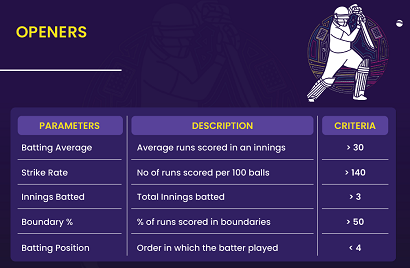

In [118]:
batsman_df.head(1)

,name,innings_batted,batting_position,innings_dismissed,total_runs,total_ball_faced,runs_scored_by_boundary,batting_average,strike_rate,boundary_scored_percentage,avg_ball_faced_per_inning
0,Aaron Finch,3,2,2,107,97,54,53.5,110.31,50.47,32.33


In [119]:
openers = batsman_df[(batsman_df.batting_average > 30) & 
                      (batsman_df.strike_rate > 140) & 
                      (batsman_df.innings_batted > 3) &
                      (batsman_df.boundary_scored_percentage >50) &
                      (batsman_df.batting_position < 4)].reset_index(drop=True)

In [120]:
openers

,name,innings_batted,batting_position,innings_dismissed,total_runs,total_ball_faced,runs_scored_by_boundary,batting_average,strike_rate,boundary_scored_percentage,avg_ball_faced_per_inning
0,Alex Hales,6,2,5,212,144,136,42.40,147.22,64.15,24.00
1,Jos Buttler,6,1,5,225,156,138,45.00,144.23,61.33,26.00
2,Kusal Mendis,8,2,7,223,156,128,31.86,142.95,57.40,19.50
3,Quinton de Kock,5,1,4,124,77,94,31.00,161.04,75.81,15.40
4,Rilee Rossouw,4,3,4,141,83,90,35.25,169.88,63.83,20.75


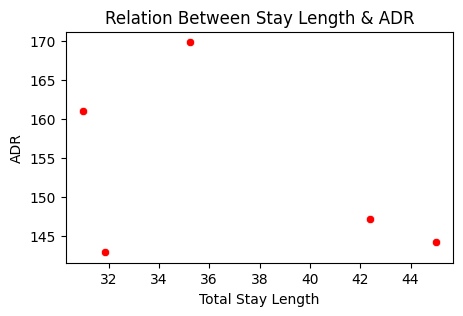

In [121]:
plt.figure(figsize = (5,3))
sns.scatterplot(data = openers,
                x = 'batting_average',
                y = 'strike_rate',
                color = 'red')
plt.title('Relation Between Stay Length & ADR')
plt.xlabel('Total Stay Length')
plt.ylabel('ADR')
plt.show()

## Middle Order


**Criteria**

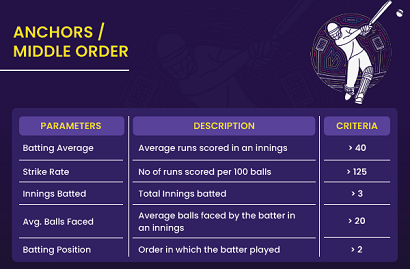

In [122]:
middle_order = batsman_df[(batsman_df.batting_average > 40) & 
                          (batsman_df.strike_rate > 125) & 
                          (batsman_df.innings_batted > 3) &
                          (batsman_df.avg_ball_faced_per_inning >20) &
                          (batsman_df.batting_position >2)].reset_index(drop=True)

In [123]:
middle_order

,name,innings_batted,batting_position,innings_dismissed,total_runs,total_ball_faced,runs_scored_by_boundary,batting_average,strike_rate,boundary_scored_percentage,avg_ball_faced_per_inning
0,Daryl Mitchell,4,5,2,109,85,26,54.50,128.24,23.85,21.25
1,Glenn Phillips,5,4,5,201,127,124,40.20,158.27,61.69,25.40
2,Lorcan Tucker,7,3,5,204,163,100,40.80,125.15,49.02,23.29
3,Suryakumar Yadav,6,4,4,239,126,158,59.75,189.68,66.11,21.00
4,Virat Kohli,6,3,3,296,217,148,98.67,136.41,50.00,36.17


## Finisher / Lower Order Anchor

**Criteria**

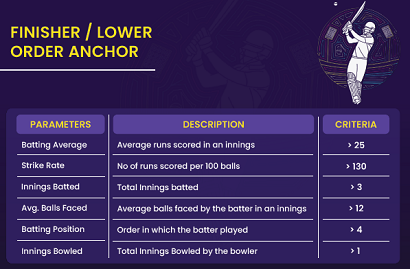

In [124]:
# we also need player who can atleast bowl if required
#join batsman table and bowler table on name
all_rounder_df = batsman_df.merge(bowler_df,
                                  on = 'name',
                                  how='inner')

In [125]:
#print
all_rounder_df.head(2)

,name,innings_batted,batting_position,innings_dismissed,total_runs,total_ball_faced,runs_scored_by_boundary,batting_average,strike_rate,boundary_scored_percentage,...,wickets,balls_bowled,runs_conceded,dot_balls,runs_conceded_by_boundary,total_extras,percent_dot_balls,economy,bowling_strike_rate,bowling_average
0,Aayan Afzal Khan,2,8,2,24,28,4,12.0,85.71,16.67,...,2,48,38,20,8,0,41.67,4.75,24.0,19.0
1,Adam Zampa,2,10,1,1,3,0,1.0,33.33,0.00,...,5,72,80,24,28,1,33.33,6.67,14.4,16.0


In [126]:
finisher = all_rounder_df[(all_rounder_df.batting_average > 25) & 
                          (all_rounder_df.strike_rate > 130) & 
                          (all_rounder_df.innings_batted > 3) &
                          (all_rounder_df.avg_ball_faced_per_inning > 12) &
                          (all_rounder_df.batting_position >= 4) &
                          (all_rounder_df.innings_bowled > 1)].reset_index(drop=True)

In [127]:
finisher

,name,innings_batted,batting_position,innings_dismissed,total_runs,total_ball_faced,runs_scored_by_boundary,batting_average,strike_rate,boundary_scored_percentage,...,wickets,balls_bowled,runs_conceded,dot_balls,runs_conceded_by_boundary,total_extras,percent_dot_balls,economy,bowling_strike_rate,bowling_average
0,Curtis Campher,6,5,5,126,77,60,25.20,163.64,47.62,...,2,48,74,17,50,0,35.42,9.25,24.00,37.00
1,Glenn Maxwell,4,4,3,118,73,80,39.33,161.64,67.80,...,3,19,19,8,8,0,42.11,6.00,6.33,6.33
2,Hardik Pandya,5,6,5,128,97,70,25.60,131.96,54.69,...,8,108,146,42,70,4,38.89,8.11,13.50,18.25
3,Marcus Stoinis,4,5,3,126,78,82,42.00,161.54,65.08,...,1,54,87,8,34,4,14.81,9.67,54.00,87.00
4,Sikandar Raza,8,5,8,219,148,130,27.38,147.97,59.36,...,10,144,156,46,44,6,31.94,6.50,14.40,15.60


## All Rounders / Lower Order

**Criteria**

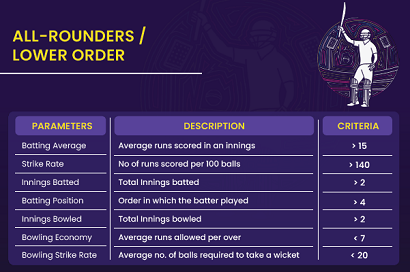

In [128]:
all_rounder = all_rounder_df[(all_rounder_df.batting_average > 15) & 
                             (all_rounder_df.strike_rate > 140) & 
                             (all_rounder_df.innings_batted > 2) &
                             (all_rounder_df.batting_position > 4) &
                             (all_rounder_df.innings_bowled > 2) &
                             (all_rounder_df.economy < 7) &
                             (all_rounder_df.bowling_strike_rate < 20)].reset_index(drop=True)

In [129]:
all_rounder

,name,innings_batted,batting_position,innings_dismissed,total_runs,total_ball_faced,runs_scored_by_boundary,batting_average,strike_rate,boundary_scored_percentage,...,wickets,balls_bowled,runs_conceded,dot_balls,runs_conceded_by_boundary,total_extras,percent_dot_balls,economy,bowling_strike_rate,bowling_average
0,Mitchell Santner,3,7,1,27,16,12,27.00,168.75,44.44,...,9,120,129,49,62,0,40.83,6.45,13.33,14.33
1,Rashid Khan,3,8,2,57,32,40,28.50,178.12,70.18,...,4,72,77,29,28,2,40.28,6.42,18.00,19.25
2,Shadab Khan,6,6,4,98,58,58,24.50,168.97,59.18,...,11,156,165,59,64,0,37.82,6.35,14.18,15.00
3,Sikandar Raza,8,5,8,219,148,130,27.38,147.97,59.36,...,10,144,156,46,44,6,31.94,6.50,14.40,15.60


## Specialist Bowler Faster and Spinner

**Criteria**

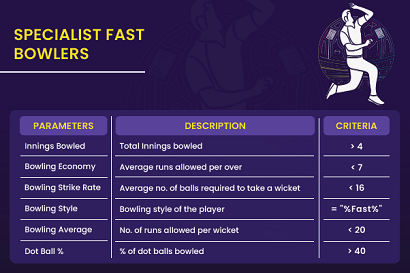

In [130]:
specialist_bowler = bowler_df[(bowler_df.innings_bowled > 4) &
                              (bowler_df.economy < 7) &
                              (bowler_df.bowling_strike_rate < 16) &
                              (bowler_df.bowling_average < 20) &
                              (bowler_df.percent_dot_balls > 39)].reset_index(drop = True)

In [131]:
specialist_bowler

,name,innings_bowled,wickets,balls_bowled,runs_conceded,dot_balls,runs_conceded_by_boundary,total_extras,percent_dot_balls,economy,bowling_strike_rate,bowling_average
0,Anrich Nortje,5,11,105,94,58,42,1,55.24,5.37,9.55,8.55
1,Mitchell Santner,5,9,120,129,49,62,0,40.83,6.45,13.33,14.33
2,Sam Curran,6,13,136,148,66,66,3,48.53,6.53,10.46,11.38
3,Shaheen Shah Afridi,7,11,151,155,70,66,2,46.36,6.16,13.73,14.09
4,Tim Southee,5,7,104,114,52,66,3,50.00,6.58,14.86,16.29
5,Wanindu Hasaranga de Silva,8,15,186,199,74,84,0,39.78,6.42,12.40,13.27


## Conclusion

Data was analyzed and final 11 players which forms best team are decided.
